**NAME:** Hazman Naim Bin Ahsan

**CLASS:** GA-DSBC-23-003

# Supervised Learning Model Evaluation for stroke diagnosis

Stroke diagnosis involves a comprehensive assessment to determine the presence, type, and severity of a stroke, a serious medical condition characterized by disrupted blood flow to the brain along with demographic details of the patients. 

DATA DESCRIPTION FOR CATEGORICAL VARIABLE:

1. gender:
Male = 1
Female = 2
Other = 3

2. ever_married:
Yes = 1
No = 2

3. work_type:
Children = 1
Private = 2
Self-employed = 3
Govt_job = 4
Never_worked = 5

4. Residence_type:
Rural = 1
Urban = 2

5. Smoking status:
smokes = 1
unknown = 2
formerly smoked = 3
never smoked = 4


# 1. Prerequisite, Importing Libraries and Packages

In [1]:
import numpy as np                          # For linear algebra
import pandas as pd                         # For data manipulation
import matplotlib as mlt                    # For visualization
import matplotlib.pyplot as plt             # For visualization(scripting layer)
import seaborn as sns                       # For visualization

pd.set_option('display.max_columns',None)   # To display all columns in a dataset

#import warnings                             # To avoid warning flash
#warnings.filterwarnings('ignore')  

# 2. Data Preparation

1. Import the stroke.csv dataset, get info, print header and examine the data

In [2]:
df = pd.read_csv('stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0


# 3. Exploratory Data Analysis

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1137.0,1.566403,0.497561,1.00,1.0,2.00,2.00,3.00
hypertension,1137.0,0.118734,0.323617,0.00,0.0,0.00,0.00,1.00
heart_disease,1137.0,0.068602,0.252887,0.00,0.0,0.00,0.00,1.00
ever_married,1137.0,1.323659,0.468077,1.00,1.0,1.00,2.00,2.00
work_type,1137.0,2.278804,0.848891,1.00,2.0,2.00,3.00,5.00
Residence_type,1137.0,1.516271,0.499955,1.00,1.0,2.00,2.00,2.00
avg_glucose_level,1137.0,107.664002,47.618723,55.27,77.6,91.82,113.85,266.59
bmi,1085.0,29.198065,7.669615,11.30,24.1,28.50,33.20,64.40
smoking_status,1137.0,2.767810,1.095245,1.00,2.0,3.00,4.00,4.00
stroke,1137.0,0.120493,0.325680,0.00,0.0,0.00,0.00,1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1137 non-null   int64  
 1   age                1137 non-null   object 
 2   hypertension       1137 non-null   int64  
 3   heart_disease      1137 non-null   int64  
 4   ever_married       1137 non-null   int64  
 5   work_type          1137 non-null   int64  
 6   Residence_type     1137 non-null   int64  
 7   avg_glucose_level  1137 non-null   float64
 8   bmi                1085 non-null   float64
 9   smoking_status     1137 non-null   int64  
 10  stroke             1137 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 97.8+ KB


In [5]:
df.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

**Data Quality Assessment**
- It seems that our dataset contains numerical feature but `age` is in incorrect data type.
- Missing values in bmi dataset.

## Data Cleaning

**Missing Values**

Impute missing values in `bmi` column.

<Axes: xlabel='bmi', ylabel='Count'>

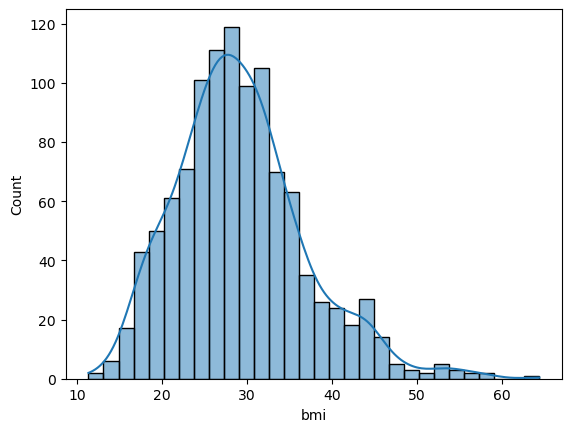

In [6]:
sns.histplot(df['bmi'], kde=True)

The distribution of the `bmi` data is nearly symmetrical, so we can impute the missing values using the mean of `bmi`.

In [7]:
df['bmi'].unique()

array([27.2, 18.6, 33. , 46. , 16.2, 30.3, 31.4, 31.7, 20.3, 27.4, 34.5,
       32.8, 17.2, 32.3, 26.1, 32.2, 29.4, 26.8, 21.7, 18.3, 22.9, 20.8,
       27. , 25.6, 24.8, 27.6, 44.6, 43.2, 33.2, 30.7, 37.6, 35.5, 25.2,
       31.1, 36. , 21.4, 24.2, 26.3, 29. , 28.4, 37.8, 30.2, 40.1, 45.9,
       33.4, 31.2, 29.1, 27.3, 24.6, 23.6, 20.2, 34.8, 28.7,  nan, 24.1,
       17.4, 32.1, 20.4, 36.9, 30.4, 25. , 31.6, 57.9, 24.3, 18.4, 20.7,
       18.2, 35.4, 30.5, 34.4, 29.9, 39.7, 58.1, 32.4, 33.9, 29.2, 29.6,
       26.5, 43.4, 16.4, 32.9, 38.7, 21.6, 25.1, 27.9, 34.1, 23.4, 20.5,
       35.6, 33.3, 28.1, 24. , 16.5, 29.7, 31.3, 31.9, 22.2, 33.1, 24.5,
       30.6, 32.5, 29.8, 36.8, 19.2, 27.1, 31.5, 48.4, 32.7, 22. , 27.5,
       30.9, 23. , 16.8, 26.2, 43.9, 27.7, 52.5, 35.7, 13.5, 23.7, 44.3,
       23.9, 42.4, 39.3, 11.5, 25.8, 15. , 18. , 28. , 21.1, 11.3, 36.7,
       28.6, 18.8, 25.4, 28.8, 40.4, 36.3, 34.2, 35.9, 19.5, 26.6, 20.9,
       45.1, 41.3, 35.8, 49.5, 13.4, 23.5, 41.5, 43

In [8]:
df['bmi'] = df['bmi'].fillna(np.mean(df['bmi']))

**Inconsistencies in `age` column**

In [9]:
df['age'].unique()

array(['31', '13', '18', '65', '4', '28', '64', '62', '26', '63', '50',
       '77', '1', '52', '24', '48', '45', '74', '3', '17', '54', '55',
       '67', '35', '38', '81', '34', '44', '79', '56', '70', '30', '39',
       '29', '80', '59', '51', '19', '43', '71', '0', '23', '53', '78',
       '66', '60', '76', '22', '6', '47', '2', '46', '11', '33', '37',
       '49', '61', '75', '40', '8', '57', '12', '21', '41', '58', '27',
       '20', '68', '42', '5', '69', '9', '36', '25', '82', '73', '32',
       '7', '16', '14', '72', '15', '10', '*82'], dtype=object)

The age value ‘\*82’ in our data is not in line with the usual numerical format for age. It’s likely that the correct age is 82, not ‘\*82’. Therefore, we can rectify this by replacing ‘\*82’ with 82.

In [10]:
df['age'] = df['age'].replace('*82', 82)

**Incorrect Data Type**

Change the data type of `age` column.

In [11]:
df['age'] = df['age'].astype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1137 non-null   int64  
 1   age                1137 non-null   int64  
 2   hypertension       1137 non-null   int64  
 3   heart_disease      1137 non-null   int64  
 4   ever_married       1137 non-null   int64  
 5   work_type          1137 non-null   int64  
 6   Residence_type     1137 non-null   int64  
 7   avg_glucose_level  1137 non-null   float64
 8   bmi                1137 non-null   float64
 9   smoking_status     1137 non-null   int64  
 10  stroke             1137 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 97.8 KB


**Check Duplicates**

Let's identify duplicates in our dataset.

In [13]:
df.duplicated().sum()

0

No duplicates in our dataset.

Our dataset is now clean.

2. The target variable is stroke, perform model evaluation by comparing 4 different algorithms. Determine the model accuracy. Plot confusion matrix for all four algorithms. Compare the model accuracy and determine which algorithm is the best fit to predict the diagnosis of stroke. 

# 4. Model Development

In [14]:
from sklearn.model_selection import train_test_split #split training and testing data

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error #model evaluation

In [15]:
accuracies = {}

**Baseline Models**

In [16]:
X = df.drop('stroke', axis=1)
Y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 228
number of training samples: 909


## Logistic Regression

In [17]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

acc = LR.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 89.47%


D:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
accuracies

{'Logistic Regression': 89.47368421052632}

## Decision Tree

In [19]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

acc = DTC.score(X_test,y_test)*100

accuracies['Decision Tree Classifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))
accuracies

Test Accuracy 79.82%


{'Logistic Regression': 89.47368421052632,
 'Decision Tree Classifier': 79.82456140350878}

## Random Forest Classifier

In [20]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

acc = RF.score(X_test,y_test)*100

accuracies['Random Forest Classifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))
accuracies

Test Accuracy 86.84%


{'Logistic Regression': 89.47368421052632,
 'Decision Tree Classifier': 79.82456140350878,
 'Random Forest Classifier': 86.8421052631579}

## K Nearest Neighbor

In [21]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

acc = KNN.score(X_test,y_test)*100

accuracies['K-Nearest Neighbors'] = acc
print("Test Accuracy {:.2f}%".format(acc))
accuracies

Test Accuracy 82.89%


{'Logistic Regression': 89.47368421052632,
 'Decision Tree Classifier': 79.82456140350878,
 'Random Forest Classifier': 86.8421052631579,
 'K-Nearest Neighbors': 82.89473684210526}

# Model Evaluation

<BarContainer object of 4 artists>


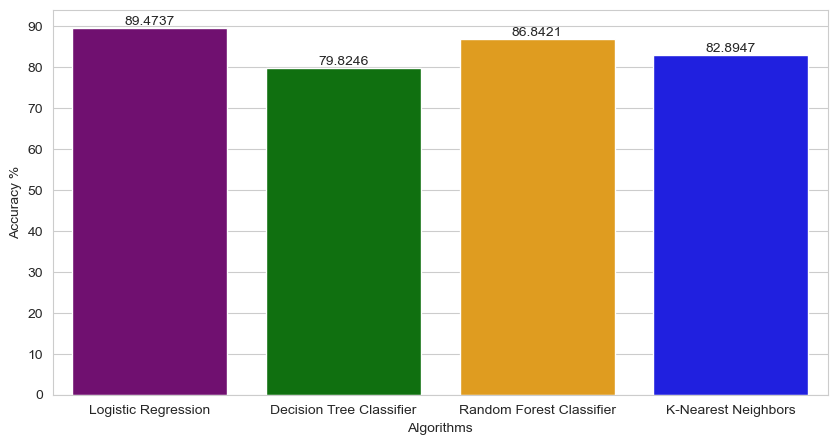

In [22]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers: #function1
    print(i)
    ax.bar_label(i, ) #function2

plt.show()

In [31]:
model = [LR, DTC, RF, KNN]
for j in model:
    prediction = j.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,prediction)
    print("")
    print("Model:",j)
    acc = j.score(X_test,y_test)*100
    accuracies['K-Nearest Neighbors'] = acc
    print("Test Accuracy {:.2f}%".format(acc))
    print(cm)


Model: LogisticRegression()
Test Accuracy 89.47%
[[198   2]
 [ 22   6]]

Model: DecisionTreeClassifier()
Test Accuracy 79.82%
[[174  26]
 [ 20   8]]

Model: RandomForestClassifier()
Test Accuracy 86.84%
[[194   6]
 [ 24   4]]

Model: KNeighborsClassifier()
Test Accuracy 82.89%
[[186  14]
 [ 25   3]]


In [42]:
models = [LR, DTC, RF, KNN]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier']
confusion_matrices = {}

for model, model_name in zip(models, model_names):
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    
    confusion_matrices[f'cm_{model_name.lower()}'] = cm
    
    if model_name == 'LogisticRegression':
        cm_lr = cm
    elif model_name == 'DecisionTreeClassifier':
        cm_dtc = cm
    elif model_name == 'RandomForestClassifier':
        cm_rf = cm
    elif model_name == 'KNeighborsClassifier':
        cm_knn = cm

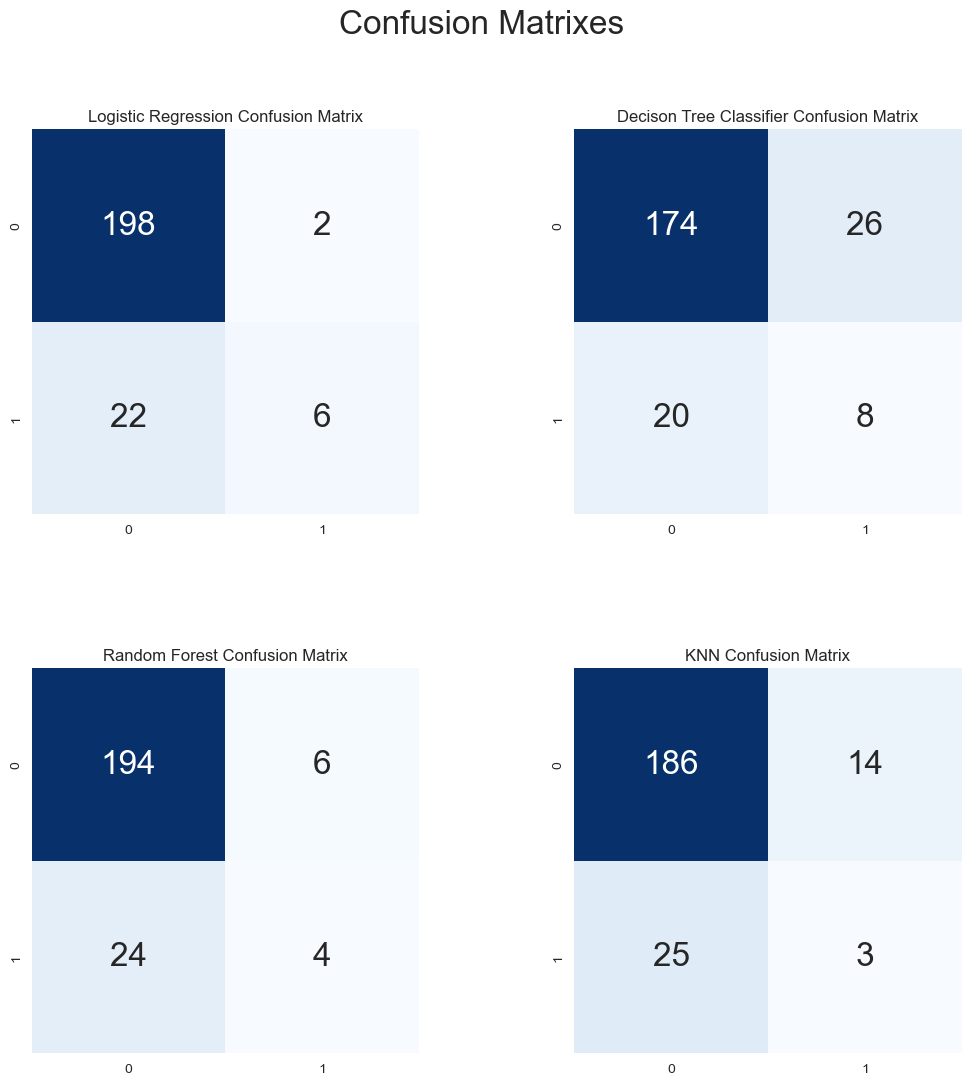

In [43]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

# Plot Logistic Regression Confusion Matrix
plt.subplot(2, 2, 1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Plot GBC Confusion Matrix
plt.subplot(2, 2, 2)
plt.title("Decison Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Plot RF Confusion Matrix
plt.subplot(2, 2, 3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Plot RF2 Confusion Matrix
plt.subplot(2, 2, 4)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()

Based on the model evaluation, logistic regression model is the best model to predict the diagnosis of stroke with accuracy of 89.47%.